In [31]:
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from pprint import pprint
import logging
from time import time
import numpy as np
import os
from sklearn.cluster import DBSCAN
import pandas as pd
import jieba

In [32]:
#!pwd
from google.colab import files
uploaded = files.upload()

Saving ChnSentiCorp_htl_all.csv to ChnSentiCorp_htl_all (1).csv


In [41]:



pd_all = pd.read_csv('ChnSentiCorp_htl_all.csv')

print('评论数目（总体）：%d' % pd_all.shape[0])
print('评论数目（正向）：%d' % pd_all[pd_all.label==1].shape[0])
print('评论数目（负向）：%d' % pd_all[pd_all.label==0].shape[0])

评论数目（总体）：7766
评论数目（正向）：5322
评论数目（负向）：2444


In [34]:
pd_all.head(2)

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!


In [42]:
#去掉正文为空的行
null = pd_all['review'].isnull()
no_null = ~null
data = pd_all[no_null]

In [36]:
null

0       False
1       False
2       False
3       False
4       False
        ...  
7761    False
7762    False
7763    False
7764    False
7765    False
Name: review, Length: 7766, dtype: bool

In [37]:
no_null

0       True
1       True
2       True
3       True
4       True
        ... 
7761    True
7762    True
7763    True
7764    True
7765    True
Name: review, Length: 7766, dtype: bool

In [43]:
'''
subset : column label or sequence of labels, optional 
用来指定特定的列，默认所有列
keep : {‘first’, ‘last’, False}, default ‘first’ 
删除重复项并保留第一次出现的项
inplace : boolean, default False 
是直接在原来数据上修改还是保留一个副本
'''
#去掉正文重复的行
data = data.drop_duplicates('review')

In [39]:
data

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"
...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...


In [44]:
#!pwd
from google.colab import files
uploaded = files.upload()


Saving 停用词汇总.txt to 停用词汇总 (1).txt


In [45]:
#使用停用词表过滤无意义的词汇
stwlist=[line.strip() for line in open('停用词汇总.txt',
'r',encoding='utf-8').readlines()]

In [ ]:
stwlist

In [46]:
#原理：将目标文本按行分隔后，把各行文本分配到多个python进程并行分词，然后归并结果，从而获得分词速度的可观提升
 # 关闭并行分词
jieba.enable_parallel()

data['正文切词'] = data['review'].apply(lambda i:jieba.lcut(i) )

In [ ]:
data

In [47]:
data['正文切词'] =[' '.join(i) for i in data['正文切词']]

In [68]:
data

,label,review,正文切词,cluster
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...","距离 川沙 公路 较近 , 但是 公交 指示 不 对 , 如果 是 "" 蔡陆线 "" 的话 ,...",23
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,商务 大床 房 ， 房间 很大 ， 床有 2M 宽 ， 整体 感觉 经济 实惠 不错 !,-1
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。,早餐 太 差 ， 无论 去 多少 人 ， 那边 也 不加 食品 的 。 酒店 应该 重视 一...,0
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...,宾馆 在 小 街道 上 ， 不大好 找 ， 但 还好 北京 热心 同胞 很多 ~ 宾馆 设施...,-1
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风","CBD 中心 , 周围 没什么 店铺 , 说 5 星 有点 勉强 . 不 知道 为什么 卫生...",-1
...,...,...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...,尼斯 酒店 的 几大 特点 ： 噪音 大 、 环境 差 、 配置 低 、 服务 效率 低 。...,-1
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...,盐城 来 了 很 多次 ， 第一次 住 盐阜 宾馆 ， 我 的确 很 失望 整个 墙壁 黑咕...,-1
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...,看 照片 觉得 还 挺不错 的 ， 又 是 4 星级 的 ， 但 入住 以后 除了 后悔 没...,-1
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...,我们 去 盐城 的 时候 那里 的 最低气温 只有 4 度 ， 晚上 冷得 要死 ， 居然 ...,-1


In [ ]:
print(data)

In [48]:
print("%d 个文档" % len(data['正文切词']))
print()


print("使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征")
t0 = time()
#Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(max_df=0.5, max_features=40000,
                                 min_df=5, stop_words=stwlist,ngram_range=(1, 2),
                                 use_idf=True)


X = vectorizer.fit_transform(data['正文切词'])

print("完成所耗费时间： %fs" % (time() - t0))
print("样本数量: %d, 特征数量: %d" % X.shape)
#print(X.toarray())
#print(vectorizer.get_feature_names())


print('特征抽取完成！')
##############################################################################

7765 个文档

使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['119', '126', '8syl7qb', 'al', 'betted', 'ceo', 'h_tml', 'lex', 'mon', 'nan', 'nbsp', 'sown', 'u3000', 'understands', 'understood', 'web1', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '于2004', '于2005', '于2006', '于2007', '于2008', '在2004', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


完成所耗费时间： 1.278704s
样本数量: 7765, 特征数量: 7531
特征抽取完成！


In [49]:
X.shape

(7765, 7531)

In [50]:
print("用LSA进行维度规约（降维）...")
t0 = time()
    
#Vectorizer的结果被归一化，这使得KMeans表现为球形k均值（Spherical K-means）以获得更好的结果。 
#由于LSA / SVD结果并未标准化，我们必须重做标准化。
    
svd = TruncatedSVD(15)
normalizer = Normalizer(copy=False)

lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("完成所耗费时间： %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("SVD解释方差的step: {}%".format(int(explained_variance * 100)))

print('PCA文本特征抽取完成！')

用LSA进行维度规约（降维）...
完成所耗费时间： 0.180156s
SVD解释方差的step: 5%
PCA文本特征抽取完成！


In [51]:
X.shape

(7765, 15)

In [54]:
# 它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分
svd.explained_variance_ratio_

array([0.002465  , 0.00500329, 0.00459007, 0.00426583, 0.00402392,
       0.00368641, 0.00366843, 0.00356003, 0.00346582, 0.00336171,
       0.00324835, 0.00314442, 0.00300208, 0.00281852, 0.00269632])

In [55]:
#进行实质性的DBScan聚类
db = DBSCAN(eps=0.2, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [82]:
len(core_samples_mask)

7765

In [81]:
len(db.core_sample_indices_)

960

In [70]:
labels = db.labels_
#len(set(db.labels_))

In [64]:
clusterTitles = db.labels_
dbscandf = data
dbscandf['cluster'] = clusterTitles

In [71]:
dbscandf

,label,review,正文切词,cluster
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较...","距离 川沙 公路 较近 , 但是 公交 指示 不 对 , 如果 是 "" 蔡陆线 "" 的话 ,...",23
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!,商务 大床 房 ， 房间 很大 ， 床有 2M 宽 ， 整体 感觉 经济 实惠 不错 !,-1
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。,早餐 太 差 ， 无论 去 多少 人 ， 那边 也 不加 食品 的 。 酒店 应该 重视 一...,0
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...,宾馆 在 小 街道 上 ， 不大好 找 ， 但 还好 北京 热心 同胞 很多 ~ 宾馆 设施...,-1
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风","CBD 中心 , 周围 没什么 店铺 , 说 5 星 有点 勉强 . 不 知道 为什么 卫生...",-1
...,...,...,...,...
7761,0,尼斯酒店的几大特点：噪音大、环境差、配置低、服务效率低。如：1、隔壁歌厅的声音闹至午夜3点许...,尼斯 酒店 的 几大 特点 ： 噪音 大 、 环境 差 、 配置 低 、 服务 效率 低 。...,-1
7762,0,盐城来了很多次，第一次住盐阜宾馆，我的确很失望整个墙壁黑咕隆咚的，好像被烟熏过一样家具非常的...,盐城 来 了 很 多次 ， 第一次 住 盐阜 宾馆 ， 我 的确 很 失望 整个 墙壁 黑咕...,-1
7763,0,看照片觉得还挺不错的，又是4星级的，但入住以后除了后悔没有别的，房间挺大但空空的，早餐是有但...,看 照片 觉得 还 挺不错 的 ， 又 是 4 星级 的 ， 但 入住 以后 除了 后悔 没...,-1
7764,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...,我们 去 盐城 的 时候 那里 的 最低气温 只有 4 度 ， 晚上 冷得 要死 ， 居然 ...,-1


In [65]:
dbscandf[dbscandf['cluster'] == 0]['review'].head(20)  #簇群tag为0的title名称

2              早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
130                          不值房价，早餐太糟，也许我去的比较晚，九点左右，没东西吃
255     早餐太差，全是素菜。另外礼宾部还弄丢了我一件行李，最后发现是被别人领走了，半天才找回来。其他...
392                        真是很好，早餐也十分让我满意，有机会去那里我还会选择这个酒店
408     地理位置还行，就在县城中心，出行比较方便。而且下面临河，风景也还说得过去。但因为是老酒店了，...
622                           房间还算可以，就是旧了些。早餐没有酸奶，有些美中不足。
911     我住过很多次，有一次住了商务套间，巨大。感觉用不了这么大的面积。在平湖来说这里算不错了，早餐...
1011                          订了标准间，给了368的房间，感觉还不错，早餐挺丰富。
1078                     可以够4星。泳池屁股大点儿，水还不清。宽带慢如牛。早餐质量不高。
1103                                比较经济,早餐还可以,就是离市区有点距离.
1110    房间很小，其他到还可以。虽然名字包含了假日，花园，但是和holidayinn,gardenh...
1159                      不错的酒店。就是早餐水果太单调。宽带直接连电信网的，速度很快。
1169                               服务态度亲切，设备较新！早餐每天更新，不错！
1183    每次来福州都住这里，比刚开始贵了不少。不过就是喜欢他们家的羽绒被，比我自己买的舒服。不知道酒...
1329     新装修的酒店,房间很新很好的,作为万豪的金卡会员,充分享受金卡的待遇,很好.早餐的品种不够丰富.
1450                    酒店的早餐太差,多少年都一样,果汁也改为果珍了,实在和4颗星不符!
1635       最后调整到新翼楼，是他们新装修的楼层。还算不错的，浴室面积很大，早餐比较丰富，但是挺贵的：）
1649    东莞的酒店在

In [72]:
#看看簇群序号为20的文章的标题有哪些，通过这个能看出聚类的实际效果如何
dbscandf[dbscandf['cluster'] == 20]['review'].head(20)  #簇群tag为20的title名称

273                            不错的酒店,地址不错,在市中心,酒店服务员态度很好.
284               这里的服务员很是不错，前些次住宿过程中给他们提出的问题都能及时纠正，赞扬一下。
2229              不错，比武汉的好多了。由于只住了一晚，没有过多的感受。只是服务员态度稍微欠佳。
2321                     不错，在普宁寺旁边，有特色。服务员态度特别好，很亲切，都穿藏服。
2500    一般，一般还是一般，但是服务员比较诚信，收订金是多付了200元，服务员马上电话到房间告知，比...
2751                那个廊灯确实很恐怖,半夜经常会亮起,还关不掉,问服务员,她说那灯就那样.晕
3788    还过的去拉。嘉兴也没社么好地方住。就是服务员早上说话太大声，扰人睡觉啊。～～大家别去定那个社...
4184              房间旧了，马桶竟然冲不去，只好换房，有服务员协助周一上午有升旗仪式，国营的风格
4647                离沟口近，可以在窗口看到进沟的人流，房间还行，就是我要存包服务员不太愿意。
5272                        房间很大，服务员的态度也很好。只是商场在招商，不是很方便！
5587                       烧水壶不会自停，烫到手，撒了一盒好茶！向服务员反映也无结果。
5739    住过的最差的之一１．房间极其闷，在高原本来就缺氧，闷在房间里极易加剧高原反应；２．简陋。窗上...
5787    之前还可以,这次去,房间地毯都是黑的,很赃,自助餐有够难吃,服务员比经理人数还少,整个酒店好...
5910                    酒店空调有问题!蚊子太多!简直无法入睡!!!服务员的态度还不错的!
5927    好烂的酒店，到前台登记的时候只有一个服务员，服务员对我同事直呼其名，同事还臭美说感觉是他大学...
6001    脏吵小慢就不多说了。主要是安全问题！！！！忘了带门卡，正好看到服务员在附近，就叫他开一下门。...
6063    酒店太脏、太旧、太破！房间厕所都是下水道的臭味！地毯已经旧的看不清楚颜色了。电视机只有6个频...
6068    房间太脏,竟

In [73]:
# 聚类数及噪点计算
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('聚类数：',n_clusters_)

print('噪点数：',n_noise_) 

聚类数： 80
噪点数： 6487


Text(0.5, 1.0, '大致聚类数: 80')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33268 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32858 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_

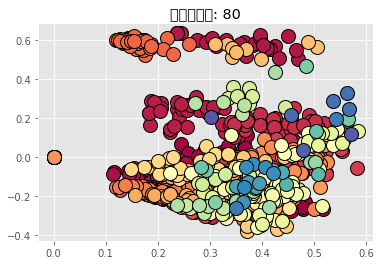

In [105]:
# #############################################################################
# 对结果可视化
import matplotlib.pyplot as plt
%matplotlib inline

# 黑色点是噪点，不参与聚类
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
          

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
  
    
    #plot noise points 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    #plot noise points 

    # xy = X[class_member_mask & ~core_samples_mask]
    # plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
    #          markeredgecolor='k', markersize=6)

plt.title('大致聚类数: %d' % n_clusters_)


In [106]:
print(labels)

[23 -1  0 ... -1 -1 -1]


In [95]:
len(core_samples_mask)

7765

In [94]:
#en(colors)
len(class_member_mask)

7765

In [97]:
xy.shape

(6487, 15)

In [100]:
xy

array([[ 0.53705364, -0.11926422, -0.04328505, ...,  0.03367909,
        -0.61036888, -0.21551524],
       [ 0.63046797,  0.16957656,  0.14810099, ..., -0.26138145,
         0.10914209, -0.02181299],
       [ 0.55168837, -0.19170515, -0.02495693, ..., -0.16423828,
        -0.49118086,  0.04739678],
       ...,
       [ 0.503778  , -0.20782848,  0.03792361, ..., -0.25607806,
        -0.07386049,  0.08930294],
       [ 0.50524192,  0.08138956, -0.26039755, ...,  0.24655441,
        -0.01354328, -0.06763497],
       [ 0.43406522,  0.22825007, -0.27822073, ...,  0.03678909,
         0.02172121,  0.08386629]])

In [101]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple turicreate 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 92.0MB 45kB/s 
     |████████████████████████████████| 86.4MB 49kB/s 
     |████████████████████████████████| 3.4MB 1.5MB/s 
     |████████████████████████████████| 327kB 1.7MB/s 
     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 3.8MB 22kB/s 
     |████████████████████████████████| 450kB 14kB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=f3c0d3a9d59cfcadcd8ea42d5649620c871e6cafe886a9f499dd7f3c8a33513e
  Stored in directory: /root/.cache/pip/wheels/c3/84/c4/402c3d965b1c337db7ed75aee2215fcf6ec1dc3b69a3d42efd
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=458853a67d6b094c719d80534de6487c0f47f3627652e784c1369b12e441d056
  Stored in directory: /root/.cache/pip/wheels/46/85/ca/e81b54f271ca53efa4212d02e67e6ac7cbf413cd8c0342f976
Successfully built resampy gast
ERROR: tens

In [102]:
# import turicreate as tc
# from sklearn.datasets import make_moons

# data = make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=19)
# sf = tc.SFrame(data[0]).unpack('X1')

# dbscan_model = tc.dbscan.create(sf, radius=0.25)
# dbscan_model.summary()

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting blockwise similarity graph construction.

max rows per data block: 8190

[INFO] turicreate.toolkits.clustering.dbscan: Identifying noise points and core points.


number of reference data blocks: 2

[INFO] turicreate.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 10000   | 33.3333     | 490us        |

| 30000   | 100         | 1.96ms       |

+---------+-------------+--------------+

+-----------------------------+

| Number of components merged |

+-----------------------------+

| 324                         |

| 0                           |

+-----------------------------+

[INFO] turicreate.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 200
Number of feature columns                : 2
Max distance to a neighbor (radius)      : 0.25
Min number of neighbors for core points  : 10
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 1.5089
Number of clusters                       : 2

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


In [103]:
# dbscan_model['cluster_id'].head(5)

row_id,cluster_id,type
92,0,core
50,1,core
68,0,core
47,1,core
70,1,core


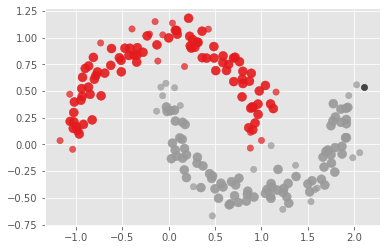

In [104]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('ggplot')

# sf = sf.add_row_number('row_id')
# sf = sf.join(dbscan_model['cluster_id'], on='row_id', how='left')
# sf = sf.rename({'cluster_id': 'dbscan_id'})

# core_mask = sf['type'] == 'core'
# boundary_mask = sf['type'] == 'boundary'
# noise_mask = sf['type'] == 'noise'

# fig, ax = plt.subplots()
# ax.scatter(sf['X1.0'][core_mask], sf['X1.1'][core_mask], s=80, alpha=0.9,
#            c=sf['dbscan_id'][core_mask], cmap=plt.cm.Set1)

# ax.scatter(sf['X1.0'][boundary_mask], sf['X1.1'][boundary_mask], s=40,
#            alpha=0.7, c=sf['dbscan_id'][boundary_mask], cmap=plt.cm.Set1)

# ax.scatter(sf['X1.0'][noise_mask], sf['X1.1'][noise_mask], s=40, alpha=0.7,
#            c='black')
# fig.show()